Pandas
======

<a id="1"></a>
1: Index
---------

- [1: Index](#1)
- [2: Summary](#2)
  - [2.1: Summary Notes](#2.1)
  - [2.2: External Links](#2.2)
    - [2.2.1: Pandas General](#2.2.1)
    - [2.2.2: Data Analysis: Feature Selection](#2.2.2)
    - [2.2.3: Example Datasets](#2.2.3)
- [3: Series](#3)
  - [3.1: Creating From `dict`](#3.1)
  - [3.2: Accessing Data](#3.2)
- [4: DataFrames](#4)
  - [4.1: Creating a DataFrame](#4.1)
    - [4.1.1: `DataFrame.from_dict` options](#4.1.1)
  - [4.2: Accessing Data](#4.2)
    - [4.2.1: Single column or row](#4.2.1)
    - [4.2.2: Single value](#4.2.2)
    - [4.2.3: A DataFrame](#4.2.3)
- [5: CSV](#5)
  - [5.1: Dr. Drang Plot](#5.1)
- [6: Manipulating Data](#6)
  - [6.0: Scenario Setup](#6.0)
  - [6.1: Updating Records](#6.1)
  - [6.2: Adding Rows](#6.2)
  - [6.3: Renaming Rows/Columns](#6.3)
  - [6.4: Deleting Rows/Columns](#6.4)
- [7: Combining Data](#7)
  - [7.0: Summary Notes](#7.0)
  - [7.1: Scenario Setup](#7.1)
  - [7.2: Performing a Merge](#7.2)
  - [7.3: Gather Insights (type conversion, date math, sorting)](#7.3)
  - [7.4: Further Research (duplicates, etc)](#7.4)
    - [7.4.1: Duplicates](#7.4.1)
    - [7.4.2: Locating records not found in another DataFrame using `isin`](#7.4.2)
    - [7.4.3: Locating blanks](#7.4.3)
- [8: Manipulating Text](#8)
  - [8.0: Scenario Setup](#8.0)
  - [8.1: Replacing Text](#8.1)
  - [8.2: Changing Case](#8.2)
  - [8.3: Challenge: Verified email list](#8.3)
- [9: Grouping](#9)
  - [9.1: Common `GroupBy` methods](#9.1)
  - [9.2: Determining Who Received the Most Transactions](#9.2)
    - [9.2.1: Attach 'grouped by' values to User table](#9.2.1)
    - [9.2.2: Remove NAs](#9.2.2)
    - [9.2.3: Prepare for Display (Sort and Show Only Relevant Columns)](#9.2.3)

<a id="2"></a>
2: Summary
----------

- [2.1: Summary Notes](#2.1)
- [2.2: External Links](#2.2)
  - [2.2.1: Pandas General](#2.2.1)
  - [2.2.2: Data Analysis: Feature Selection](#2.2.2)
  - [2.2.3: Example Datasets](#2.2.3)

<a id="2.1"></a>
### 2.1: Summary Notes ###

- Pandas is built on top of numpy
- It allows more sophisticated *Series* (like a dict) 
  and *Data Frame* (like a table) objects
- the datatype of the contained data is a NumPy.Scalar (e.g., float64)

<a id="2.2"></a>
### 2.2: External Links ###

<a id="2.2.1"></a>
#### 2.2.1: Pandas General ####
- [Official Pandas Cookbook](https://pandas.pydata.org/pandas-docs/stable/user_guide/cookbook.html)

<a id="2.2.2"></a>
#### 2.2.2: Data Analysis: Feature Selection ####
- [An Introduction to Feature Selection](https://machinelearningmastery.com/an-introduction-to-feature-selection/)
- [An Introduction to Variable and Feature Selection (*pdf*)](http://www.jmlr.org/papers/volume3/guyon03a/guyon03a.pdf)
- [Scikit-learn: Feature Selection](https://scikit-learn.org/stable/modules/feature_selection.html)

<a id="2.2.3"></a>
#### 2.2.3: Example Datasets ####
- [Kaggle](https://www.kaggle.com)

<a id="3"></a>
3: Series
----------

- [3.1: Creating From `dict`](#3.1)
- [3.2: Accessing Data](#3.2)

In [1]:
import numpy as np
import pandas as pd

<a id="3.1"> </a>
### 3.1: Create from a dict ###

- Use the `Series` constructor (accepts any dict-like object)
- Can also take a data iterable (plus an optional same-length iterable
  representing data labels)

In [2]:
test_balance_data = {
    'alice': 20.00,
    'bob': 20.18,
    'carol': 1.05,
    'dan': 42.42,
}
balances = pd.Series(test_balance_data)
balances

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

In [3]:
values = list(test_balance_data.values())
unlabeled_balances = pd.Series(values)
unlabeled_balances

0    20.00
1    20.18
2     1.05
3    42.42
dtype: float64

In [4]:
labels = list(test_balance_data.keys())
unlabeled_balances = pd.Series(values, index=labels)
unlabeled_balances

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

<a id="3.2"> </a>
### 3.2: Accessing Data ###

- by index (aka `.iloc`)
- by label (if labelled) (aka `.loc`)
- like a dict (`.items()`, `.keys()`) **but note `.values` 
  NOT `.values()`**
- with dot notation (as long as label meets variable naming constraints)
- by slice (but note slicing with labels is inclusive)

In [5]:
# Optional import to use markdown-formatted output
from IPython.display import display, Markdown

def render(md):
    return display(Markdown(md))

In [6]:
print( balances[0] )
print( type(balances[0]) )
print( balances[-1] )
print( balances.iloc[0] )

20.0
<class 'numpy.float64'>
42.42
20.0


In [7]:
print( balances['alice'] )
print( balances['dan'] )
print( balances.loc['alice'] )

20.0
42.42
20.0


In [8]:
for label, value in balances.items():
    print(f'The label {label} has a value of {value}')

The label alice has a value of 20.0
The label bob has a value of 20.18
The label carol has a value of 1.05
The label dan has a value of 42.42


In [9]:
print( balances.keys() )
print( balances.values )  # .values NOT .values()

Index(['alice', 'bob', 'carol', 'dan'], dtype='object')
[20.   20.18  1.05 42.42]


In [10]:
try:
    balances['bmo']
except KeyError:
    render('Accessing a non-existent key raises `KeyError`')

Accessing a non-existent key raises `KeyError`

In [11]:
if 'bmo' not in balances:
    print("Use `in` to test the existence of a label")

Use `in` to test the existence of a label


In [12]:
balances.alice

20.0

In [13]:
# Slicing by index excludes the end value
balances.iloc[0:3]  # items 0, 1, 2

alice    20.00
bob      20.18
carol     1.05
dtype: float64

In [14]:
# Slicing by values includes the end value
balances.loc['alice':'dan']

alice    20.00
bob      20.18
carol     1.05
dan      42.42
dtype: float64

In [15]:
# Reminder: Vectorization and Broadcasting
#
# In addition to overloading the regular arithmetic operators, numpy has overloaded
# the associated assignment operators. Thus we can broadcast a new value to a variable
# as follows:
balances += 1
print(balances)

alice    21.00
bob      21.18
carol     2.05
dan      43.42
dtype: float64


In [16]:
# broadcasting a mismatched series
#
payments = pd.Series({
    'alice': -2.00,  # Note no value for bob
    'carol': -0.50,
    'dan': -10.02,
})
balances - payments

# By default numpy will fill any missing value with NaN
# We can override this by specifying a `fill_value`:
balances.subtract(payments, fill_value=0)

alice    23.00
bob      21.18
carol     2.55
dan      53.44
dtype: float64

<a id="4"></a>
4: DataFrames
-------------

- [4.1: Creating a DataFrame](#4.1)
  - [4.1.1: `DataFrame.from_dict` options](#4.1.1)
- [4.2: Accessing Data](#4.2)
  - [4.2.1: Single column or row](#4.2.1)
  - [4.2.2: Single value](#4.2.2)
  - [4.2.3: A DataFrame](#4.2.3)


<a id="4.1"> </a>
### 4.1: Creating a DataFrame ###

- From a 2D object
  - 2D-list: both rows and columns will have autogenerated 0-based labels. Override rows
    with the `index` parameter and columns with the `columns` parameter
  - Dict (default expected layout is key=column name, values=ordered values)

In [17]:
test_users_list = [
    ['Alice', 'Smith', 42.42],
    ['Bob', 'Jones', 25.00],
]
pd.DataFrame(test_users_list)

,0,1,2
0,Alice,Smith,42.42
1,Bob,Jones,25.00


In [18]:
row_labels = ['alicesmith', 'bobjones']
col_labels = ['first_name', 'last_name', 'balance']
pd.DataFrame(test_users_list, index=row_labels, columns=col_labels)

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


In [19]:
test_users_dict = {
    'first_name': ['Alice', 'Bob'],
    'last_name': ['Smith', 'Jones'],
    'balance': [42.42, 25.00],
}
pd.DataFrame(test_users_dict, index=row_labels)  # index is optional

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


<a id="4.1.1"> </a>
#### 4.1.1: `DataFrame.from_dict` options ####

- `orient`: This allows you to specify whether the keys of the dict are row labels (`index`)
  or column titles (`columns`).

In [20]:
# Here we are using nested dictionaries to define the columns but we could pass lists for
# the columns
by_username = {
    'alicesmith': {
        'first_name': 'Alice',
        'last_name': 'Smith',
        'balance': 42.42
    },
    'bobjones': {
        'first_name': 'Bob',
        'last_name': 'Jones',
        'balance': 25.00
    }
}

pd.DataFrame.from_dict(by_username, orient='index')

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


In [21]:
by_username_lists = {
    'alicesmith': ['Alice', 'Smith', 42.42],
    'bobjones': ['Bob', 'Jones', 25.00],
}

pd.DataFrame.from_dict(by_username_lists, orient='index', columns=col_labels)

,first_name,last_name,balance
alicesmith,Alice,Smith,42.42
bobjones,Bob,Jones,25.00


<a id="4.2"> </a>
### 4.2: Accessing Data ###

<a id="4.2.1"> </a>
#### 4.2.1: Single column or row ####

You can get a `Series` representing a single column or row:

- by column name (each column is a `Series`). The column gets a label `name` which can
  be accessed using dot syntax;
- by Label, using the `loc` property. The value passed into `loc` becomes the `name` label
  for the row;
- by Position, using the `iloc` property

In [22]:
users = pd.DataFrame.from_dict(by_username, orient='index')
balances = users['balance']
print( balances )
print( balances.name )

alicesmith    42.42
bobjones      25.00
Name: balance, dtype: float64
balance


In [23]:
print( users.loc['alicesmith'] )
print( users.loc['alicesmith'].name )

first_name    Alice
last_name     Smith
balance       42.42
Name: alicesmith, dtype: object
alicesmith


In [24]:
users.iloc[1]

first_name      Bob
last_name     Jones
balance          25
Name: bobjones, dtype: object

<a id="4.2.2"> </a>
#### 4.2.2: Single value ####

- by chaining (this runs multiple separate lookups so can be inefficient)
- by row and column
  - using `.loc` and passing a tuple,
  - using `.at` and passing a tuple (more explicit than `.loc`)

In [25]:
# Chaining:
# (here we are getting the `first_name` Series (which uses the row labels as its index), then
# we use the row label to get the specific value)
users['first_name']['alicesmith']

'Alice'

In [26]:
# Row and column using `.loc` and a tuple of labels
users.loc['alicesmith', 'last_name']

'Smith'

In [27]:
# Row and column using `.at` and a tuple of labels
users.at['alicesmith', 'last_name']

'Smith'

<a id="4.2.3"> </a>
#### 4.2.3: A DataFrame ####

We can use slicing with `.loc` or `.iloc` to get a DataFrame of a subset of the 
base DataFrame

In [28]:
# using `.loc` the results are inclusive
users.loc[:, ['last_name', 'balance']]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [29]:
users.loc[:, 'last_name':]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [30]:
users.loc['alicesmith':'bobjones', 'last_name':]

,last_name,balance
alicesmith,Smith,42.42
bobjones,Jones,25.00


In [31]:
# using `.iloc` the results are exclusive
users.iloc[0:1, 1:2]

,last_name
alicesmith,Smith


<a id="5"></a>
5: CSV
------

pandas has a built-in method for reading CSVs: `.read_csv("path/to/file")`

In [32]:
filename = 'data.csv'

In [33]:
"""
with open(filename, 'r') as fh:
    for _ in range(5):
        # The `file` object is an iterator, so just get the next line
        print(next(fh))
"""

"\nwith open(filename, 'r') as fh:\n    for _ in range(5):\n        # The `file` object is an iterator, so just get the next line\n        print(next(fh))\n"

In [34]:
#cases = pd.read_csv(filename, index_col=0, parse_dates=['Date'])
cases = pd.read_csv(filename, parse_dates=['Date'])
print(cases)


         Date    AB  Cumulative  Deaths  Recoveries
0  2020-03-05   1.0           1       0           0
1  2020-03-06   1.0           2       0           0
2  2020-03-07   NaN           2       0           0
3  2020-03-08   2.0           4       0           0
4  2020-03-09   3.0           7       0           0
5  2020-03-10   7.0          14       0           0
6  2020-03-11   5.0          19       0           0
7  2020-03-12   4.0          23       0           0
8  2020-03-13   6.0          29       0           0
9  2020-03-14  10.0          39       0           0
10 2020-03-15  17.0          56       0           0
11 2020-03-16  18.0          74       0           0
12 2020-03-17  23.0          97       0           0
13 2020-03-18  22.0         119       0           0
14 2020-03-19  27.0         146       1           0
15 2020-03-20  49.0         195       0           3
16 2020-03-21  31.0         226       0           0
17 2020-03-22  33.0         259       0           0
18 2020-03-2

Some observations:
- blank cells are populated with `NaN`
- If we specify that the first column should be the `index_col` it is not treated
  as a regular column. If we omit `index_col`, pandas will auto-generate a 0-based index
  column (starting at the first data row)
- If we want to be able to manipulate the field that was the index in the CSV, we are best
  importing it as a regular column and auto-generating the index column (compare the
  two imports above)

In [35]:
# Remove the blank final row (if necessary)
#cases = cases.iloc[0:-1,0:]
print(cases)

         Date    AB  Cumulative  Deaths  Recoveries
0  2020-03-05   1.0           1       0           0
1  2020-03-06   1.0           2       0           0
2  2020-03-07   NaN           2       0           0
3  2020-03-08   2.0           4       0           0
4  2020-03-09   3.0           7       0           0
5  2020-03-10   7.0          14       0           0
6  2020-03-11   5.0          19       0           0
7  2020-03-12   4.0          23       0           0
8  2020-03-13   6.0          29       0           0
9  2020-03-14  10.0          39       0           0
10 2020-03-15  17.0          56       0           0
11 2020-03-16  18.0          74       0           0
12 2020-03-17  23.0          97       0           0
13 2020-03-18  22.0         119       0           0
14 2020-03-19  27.0         146       1           0
15 2020-03-20  49.0         195       0           3
16 2020-03-21  31.0         226       0           0
17 2020-03-22  33.0         259       0           0
18 2020-03-2

In [36]:
# A quick way to check if the CSV was read correctly is to use the .head() method
# (it takes an optional argument to specify the number of lines)
cases.head()

,Date,AB,Cumulative,Deaths,Recoveries
0,2020-03-05,1.0,1,0,0
1,2020-03-06,1.0,2,0,0
2,2020-03-07,NaN,2,0,0
3,2020-03-08,2.0,4,0,0
4,2020-03-09,3.0,7,0,0


In [37]:
# we can explore the data:
print('shape:\n', cases.shape )
print('count:\n ', cases.count() )  # number of non-empty values for each column (use `len()` to get total rows)
print('datatypes:\n', cases.dtypes )
print('describe:\n', cases.describe() )  # most of these aggregations can be accessed as methods as well

shape:
 (25, 5)
count:
  Date          25
AB            24
Cumulative    25
Deaths        25
Recoveries    25
dtype: int64
datatypes:
 Date          datetime64[ns]
AB                   float64
Cumulative             int64
Deaths                 int64
Recoveries             int64
dtype: object
describe:
               AB  Cumulative     Deaths  Recoveries
count  24.000000   25.000000  25.000000   25.000000
mean   27.541667  188.000000   0.120000    2.920000
std    23.812637  211.783104   0.331662    7.094129
min     1.000000    1.000000   0.000000    0.000000
25%     5.750000   19.000000   0.000000    0.000000
50%    22.500000   97.000000   0.000000    0.000000
75%    43.750000  301.000000   0.000000    0.000000
max    79.000000  661.000000   1.000000   24.000000


In [38]:
print( cases.mean() )

AB             27.541667
Cumulative    188.000000
Deaths          0.120000
Recoveries      2.920000
dtype: float64


In [39]:
print( cases.std() )

AB             23.812637
Cumulative    211.783104
Deaths          0.331662
Recoveries      7.094129
dtype: float64


In [40]:
print( cases.min() )

Date          2020-03-05 00:00:00
AB                              1
Cumulative                      1
Deaths                          0
Recoveries                      0
dtype: object


In [41]:
print( cases.max() )

Date          2020-03-29 00:00:00
AB                             79
Cumulative                    661
Deaths                          1
Recoveries                     24
dtype: object


In [42]:
alt_sort = cases.sort_values(by='AB', ascending=False).head()  # can optionally pass `inplace=True` to mutate the original data
alt_sort.sort_index()  # sort a DataFrame by the index column

,Date,AB,Cumulative,Deaths,Recoveries
19,2020-03-24,57.0,358,1,0
20,2020-03-25,61.0,419,0,0
21,2020-03-26,67.0,486,0,24
22,2020-03-27,56.0,542,0,6
23,2020-03-28,79.0,621,0,20


<a id="5.1"> </a>
### 5.1: Dr. Drang Plot ###

         Date    AB  Cumulative  Deaths  Recoveries  Log2Count  PolyCount  \
0  2020-03-05   1.0           1       0           0   0.000000   1.000000   
1  2020-03-06   1.0           2       0           0   1.000000   1.259921   
2  2020-03-07   NaN           2       0           0   1.000000   1.259921   
3  2020-03-08   2.0           4       0           0   2.000000   1.587401   
4  2020-03-09   3.0           7       0           0   2.807355   1.912931   
5  2020-03-10   7.0          14       0           0   3.807355   2.410142   
6  2020-03-11   5.0          19       0           0   4.247928   2.668402   
7  2020-03-12   4.0          23       0           0   4.523562   2.843867   
8  2020-03-13   6.0          29       0           0   4.857981   3.072317   
9  2020-03-14  10.0          39       0           0   5.285402   3.391211   
10 2020-03-15  17.0          56       0           0   5.807355   3.825862   
11 2020-03-16  18.0          74       0           0   6.209453   4.198336   

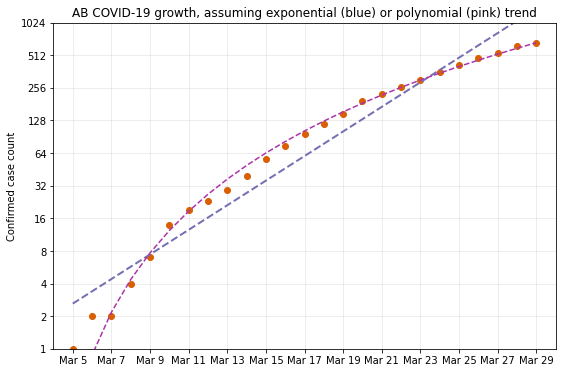

In [104]:
# Replicating Dr. Drang's plot from
# https://leancrew.com/all-this/2020/03/exponential-growth-and-log-scales/

# Add Required Data to Table
# --------------------------
# Extend the table with base-2 log of the cumulative case count
cases['Log2Count'] = np.log2(cases.Cumulative)
# Extend the table with polynomial root of the cumulative case count
POLY_VAL = 3.0
cases['PolyCount'] = cases.Cumulative ** (1/POLY_VAL)

# We can only do the following date math if we imported the date as a data column
# Extend the table with the day number
firstDate = cases.Date[0]
cases['Days'] = (cases.Date - firstDate).dt.days

# Extend the table with the best exponential fit
from scipy.stats import linregress
lr = linregress(cases.Days, cases.Log2Count)
cases['Fit'] = 2 ** (lr.intercept + lr.slope * cases.Days)
# Extend the table with the best polynomial fit
lr2 = linregress(cases.Days, cases.PolyCount)
cases['PFit'] = (lr2.intercept + lr2.slope * cases.Days) ** POLY_VAL

print(cases)
print(cases.PFit.sum())

# Construct Plot
# --------------
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(9,6))
plt.yscale('log', basey=2)
ax.plot(cases.Days, cases.Cumulative, 'o', color='#d95f02', lw=1)
ax.plot(cases.Days, cases.Fit, '--', color='#7570b3', lw=2)
# Add polynomial best fit
ax.plot(cases.Days, cases.PFit, '--', color='#aa33aa', lw=1.5)

# Determine ticks etc
from math import log2, ceil
yStart = 1
coordMax = log2(cases.Cumulative.max()/yStart)
expMax = ceil(coordMax)
yAdd = .4142*yStart*2**expMax if expMax - coordMax < .1 else 0
yMax = yStart * (2 ** expMax) + yAdd
plt.ylim(ymin=yStart, ymax=yMax)
majors = np.array([ yStart * 2 ** i for i in range(expMax+1) ])
ax.set_yticks(majors)
ax.set_yticklabels(majors)

from datetime import timedelta
dateTickFreq = 2
dMax = cases.Days.max()
xAdd = 2 if cases.Days.max() % dateTickFreq else 1
plt.xlim(xmin=-1, xmax=dMax + 1)
ax.set_xticks([ x for x in range(0, dMax+xAdd, dateTickFreq) ])
dates = [ (firstDate.date() + timedelta(days=x)).strftime('%b %-d') for x in range(0, dMax+xAdd, dateTickFreq)]
ax.set_xticklabels(dates)
ax.grid(linewidth=.5, which='major', color='#ddd', linestyle='-')


# Add labels/title
title = 'AB COVID-19 growth, assuming exponential (blue) or polynomial (pink) trend'
plt.title(title)
plt.ylabel('Confirmed case count')

plt.show()


<a id="6"></a>
6: Manipulating Data
------------------------

- [6.0: Scenario Setup](#6.0)
- [6.1: Updating Records](#6.1)
- [6.2: Adding Rows](#6.2)
- [6.3: Renaming Rows/Columns](#6.3)
- [6.4: Deleting Rows/Columns](#6.4)

<a id="6.0"></a>
### 6.0: Scenario Setup ###

In [44]:
# all other necessary imports are done in section 3
import os

transactions = pd.read_csv(os.path.join('thirdpartydata', 'transactions.csv'), index_col=0)
users = pd.read_csv(os.path.join('thirdpartydata', 'users.csv'), index_col=0)  # for consistency with Treehouse version

print( transactions.head() )
print( users.head() )
print( 'shape: ', users.shape, transactions.shape )

       sender      receiver  amount   sent_date
0       stein        smoyer   49.03  2018-01-24
1  holden4580  joshua.henry   34.64  2018-02-06
2  rose.eaton   emily.lewis   62.67  2018-02-15
3      lmoore        kallen    1.94  2018-03-05
4   scott3928        lmoore   27.82  2018-03-10
              first_name last_name                          email  \
aaron              Aaron     Davis            aaron6348@gmail.com   
acook            Anthony      Cook                 cook@gmail.com   
adam.saunders       Adam  Saunders                 adam@gmail.com   
adrian            Adrian      Fang  adrian.fang@teamtreehouse.com   
adrian.blair      Adrian     Blair           adrian9335@gmail.com   

               email_verified signup_date  referral_count  balance  
aaron                    True  2018-08-31               6    18.14  
acook                    True  2018-05-12               2    55.45  
adam.saunders           False  2018-05-29               3    72.12  
adrian               

<a id="6.1"></a>
### 6.1: Updating Records ###

We can use `loc` to update one or more records. Examples:

- single row label, e.g., `users.loc['wking', 'balance'] = 35.00` (sets the `balance`
  value on the `wking` row to 35. Note this is equivalent to
  `users.at['wking', 'balance'] = 35.00`
- access a group of rows, e.g., `users.loc[users.referral_count < 3, 'balance'] = 0.00`
  (we can use this approach to find a specific row when we don't know the row label and
  change a single value, as in the example below)

In [45]:
# first double-check that this first_name/last_name combination is unique
print( users[(users.first_name == 'Adrian') & (users.last_name == 'Fang')] )

# now access and amend the record using the first_name/last_name combination
users.loc[(users.first_name == 'Adrian') & (users.last_name == 'Fang'), 'balance'] = 35.0
users.loc['adrian']

# If we had known ahead of time that the row label we wanted was 'adrian' we could have
# just used the `.at` syntax

       first_name last_name                          email  email_verified  \
adrian     Adrian      Fang  adrian.fang@teamtreehouse.com            True   

       signup_date  referral_count  balance  
adrian  2018-04-28               3    30.01  


first_name                               Adrian
last_name                                  Fang
email             adrian.fang@teamtreehouse.com
email_verified                             True
signup_date                          2018-04-28
referral_count                                3
balance                                      35
Name: adrian, dtype: object

<a id="6.2"> </a>
### 6.2: Adding Rows ###

- using append
  warning: append returns a new dataframe, it doesn't mutate the existing dataframe
- using enlargement (assigning to a non-existent key)

In [46]:
# Create a new record
from datetime import datetime
now = datetime.now().date()
record = {
    'sender': np.nan,
    'receiver': 'adrian',
    'amount': 4.99,
    'sent_date': now
}

In [47]:
# 6.2.1 Append
# Use append to generate a new dataframe
# `ignore_index` lets pandas generate a new index
transactions.append(record, ignore_index=True).tail()

,sender,receiver,amount,sent_date
994,king3246,john,25.37,2018-09-25
995,shernandez,kristen1581,75.77,2018-09-25
996,leah6255,jholloway,63.62,2018-09-25
997,pamela,michelle4225,2.54,2018-09-25
998,NaN,adrian,4.99,2020-03-29


In [48]:
# 6.2.2 Enlargement

# First we need to determine what the next available key is
next_key = transactions.index.max() + 1

# Now enlarge
transactions.loc[next_key] = record

# Verify it got added
transactions.tail()

,sender,receiver,amount,sent_date
994,king3246,john,25.37,2018-09-25
995,shernandez,kristen1581,75.77,2018-09-25
996,leah6255,jholloway,63.62,2018-09-25
997,pamela,michelle4225,2.54,2018-09-25
998,NaN,adrian,4.99,2020-03-29


In [49]:
# We can also use enlargement to add columns
# Here we're adding a new column 'notes' and giving it a value for a particular record
# (all other records will have that field set to NaN)
latest_id = transactions.index.max()
transactions.at[latest_id, 'notes'] = 'Adrian called support to report billing error'

transactions.tail()

,sender,receiver,amount,sent_date,notes
994,king3246,john,25.37,2018-09-25,NaN
995,shernandez,kristen1581,75.77,2018-09-25,NaN
996,leah6255,jholloway,63.62,2018-09-25,NaN
997,pamela,michelle4225,2.54,2018-09-25,NaN
998,NaN,adrian,4.99,2020-03-29,Adrian called support to report billing error


In [50]:
# Another example
transactions['large'] = transactions.amount > 50
transactions.tail()

,sender,receiver,amount,sent_date,notes,large
994,king3246,john,25.37,2018-09-25,NaN,False
995,shernandez,kristen1581,75.77,2018-09-25,NaN,True
996,leah6255,jholloway,63.62,2018-09-25,NaN,True
997,pamela,michelle4225,2.54,2018-09-25,NaN,False
998,NaN,adrian,4.99,2020-03-29,Adrian called support to report billing error,False


<a id="6.3"> </a>
### 6.3: Renaming Rows/Columns ###

In [51]:
# Row
print('before: ')
users.tail(2).head(1)

before: 


,first_name,last_name,email,email_verified,signup_date,referral_count,balance
young,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39


In [52]:
users.rename(index={'young': 'young.jessica'}, inplace=True)
print('after: ')
users.tail(2).head(1)

after: 


,first_name,last_name,email,email_verified,signup_date,referral_count,balance
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39


In [53]:
# Column
transactions.rename(columns={'large': 'big_sender', 'notes': 'details'}, inplace=True)
transactions.head()

,sender,receiver,amount,sent_date,details,big_sender
0,stein,smoyer,49.03,2018-01-24,NaN,False
1,holden4580,joshua.henry,34.64,2018-02-06,NaN,False
2,rose.eaton,emily.lewis,62.67,2018-02-15,NaN,True
3,lmoore,kallen,1.94,2018-03-05,NaN,False
4,scott3928,lmoore,27.82,2018-03-10,NaN,False


<a id="6.4"> </a>
### 6.4: Deleting Rows/Columns ###

Instead of slicing a DataFrame to exclude unwanted rows/columns, you might want to actually
delete them

In [54]:
# Rows
print('before:')
users.tail()

before:


,first_name,last_name,email,email_verified,signup_date,referral_count,balance
wilson,Robert,Wilson,robert@yahoo.com,False,2018-05-16,5,59.75
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08
wright3590,Jacqueline,Wright,jacqueline.wright@gonzalez.com,True,2018-02-08,6,18.48
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39
zachary.neal,Zachary,Neal,zneal@gmail.com,True,2018-07-26,1,39.90


In [55]:
users.drop(index=['zachary.neal'], inplace=True)
users.tail()

,first_name,last_name,email,email_verified,signup_date,referral_count,balance
william6714,William,NaN,william5677@yahoo.com,True,2018-04-26,3,74.65
wilson,Robert,Wilson,robert@yahoo.com,False,2018-05-16,5,59.75
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08
wright3590,Jacqueline,Wright,jacqueline.wright@gonzalez.com,True,2018-02-08,6,18.48
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39


In [56]:
users.drop(index=['wright3590', 'wilson'], inplace=True)
users.tail()

,first_name,last_name,email,email_verified,signup_date,referral_count,balance
william2231,William,Douglas,douglas8813@yahoo.com,True,2018-05-19,4,85.32
william4588,William,Pittman,william.pittman@gmail.com,True,2018-04-11,2,2.04
william6714,William,NaN,william5677@yahoo.com,True,2018-04-26,3,74.65
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39


In [57]:
# Columns
transactions.drop(columns=['details'], inplace=True)
transactions.head()

,sender,receiver,amount,sent_date,big_sender
0,stein,smoyer,49.03,2018-01-24,False
1,holden4580,joshua.henry,34.64,2018-02-06,False
2,rose.eaton,emily.lewis,62.67,2018-02-15,True
3,lmoore,kallen,1.94,2018-03-05,False
4,scott3928,lmoore,27.82,2018-03-10,False


In [58]:
transactions.drop(['big_sender'], axis='columns', inplace=True)
transactions.head()

,sender,receiver,amount,sent_date
0,stein,smoyer,49.03,2018-01-24
1,holden4580,joshua.henry,34.64,2018-02-06
2,rose.eaton,emily.lewis,62.67,2018-02-15
3,lmoore,kallen,1.94,2018-03-05
4,scott3928,lmoore,27.82,2018-03-10


<a id="7"> </a>
7: Combining Data
------------------

- [7.0: Summary Notes](#7.0)
- [7.1: Scenario Setup](#7.1)
- [7.2: Performing a Merge](#7.2)
- [7.3: Gather Insights (type conversion, date math, sorting)](#7.3)
- [7.4: Further Research (duplicated/missing data, etc)](#7.4)
  - [7.4.1: Duplicates](#7.4.1)
  - [7.4.2: Locating records not found in another DataFrame using `isin`](#7.4.2)
  - [7.4.3: Locating blanks](#7.4.3)

<a id="7.0"> </a>
### 7.0: Summary Notes ###
- `merge()`: like a SQL JOIN

<a id="7.1"> </a>
### 7.1: Scenario Setup ###


In [59]:
requests = pd.read_csv(os.path.join('thirdpartydata', 'requests.csv'), index_col=0)
requests.shape

# rename headings so that the party and transaction direction is still clear when joined
requests.rename(columns={'from_user': 'requester', 'to_user': 'requestee'}, inplace=True)
transactions.rename(columns={'sender': 'funder', 'receiver': 'fundee'}, inplace=True)

In [60]:
transactions.head(2)

,funder,fundee,amount,sent_date
0,stein,smoyer,49.03,2018-01-24
1,holden4580,joshua.henry,34.64,2018-02-06


In [61]:
requests.head(2)

,requester,requestee,amount,request_date
0,chad.chen,paula7980,78.61,2018-02-12
1,kallen,lmoore,1.94,2018-02-23


<a id="7.2"> </a>
### 7.2: Performing a Merge ###

Suppose we want to see all requests that have a matching transaction based on the users and
amounts involved.

In [62]:
# Since we are merging `transactions` into `requests`, `requests` is the left side and
# `transactions` is the right side.
completed_requests = requests.merge(
    transactions,
    # Now we line up the columns that are being used to identify the join
    left_on=['requester', 'requestee', 'amount'],
    right_on=['fundee', 'funder', 'amount'],
)
completed_requests.head()

,requester,requestee,amount,request_date,funder,fundee,sent_date
0,chad.chen,paula7980,78.61,2018-02-12,paula7980,chad.chen,2018-07-15
1,kallen,lmoore,1.94,2018-02-23,lmoore,kallen,2018-03-05
2,gregory.blackwell,rodriguez5768,30.57,2018-03-04,rodriguez5768,gregory.blackwell,2018-03-17
3,kristina.miller,john.hardy,77.05,2018-03-12,john.hardy,kristina.miller,2018-04-25
4,lacey8987,mcguire,54.09,2018-03-13,mcguire,lacey8987,2018-06-28


<a id="7.3"> </a>
### 7.3: Gather Insights (type conversion, date math, sorting) ###

Suppose we want to compare the request date and sent date. Right now, the dates are stored as "object" rather than date or datetime objects:

In [63]:
completed_requests.dtypes

requester        object
requestee        object
amount          float64
request_date     object
funder           object
fundee           object
sent_date        object
dtype: object

We can convert columns (which are just `Series`) on CSV import of when we need them by using the `pandas.to_datetime()` method. Here is an example of an approach:

In [64]:
completed_requests['request_date'] = pd.to_datetime(completed_requests['request_date'])
completed_requests['sent_date'] = pd.to_datetime(completed_requests['sent_date'])
completed_requests.dtypes

requester               object
requestee               object
amount                 float64
request_date    datetime64[ns]
funder                  object
fundee                  object
sent_date       datetime64[ns]
dtype: object

In [65]:
completed_requests['time_passed'] = completed_requests.sent_date - completed_requests.request_date
completed_requests.sort_values(by="time_passed", ascending=False).head()

,requester,requestee,amount,request_date,funder,fundee,sent_date,time_passed
0,chad.chen,paula7980,78.61,2018-02-12,paula7980,chad.chen,2018-07-15,153 days
33,sthompson,andrade,14.07,2018-05-09,andrade,sthompson,2018-09-21,135 days
4,lacey8987,mcguire,54.09,2018-03-13,mcguire,lacey8987,2018-06-28,107 days
53,marcus.berry,melissa.mendoza,71.48,2018-05-31,melissa.mendoza,marcus.berry,2018-09-06,98 days
39,bishop,massey2102,18.27,2018-05-16,massey2102,bishop,2018-08-15,91 days


Let's see the total amount sent:

In [66]:
f'${completed_requests.amount.sum():,.2f} has passed through the request system in {len(completed_requests)} transactions.'

'$10,496.47 has passed through the request system in 214 transactions.'

<a id="7.4"> </a>
### 7.4: Further Research (duplicated/missing data, etc) ###

- [7.4.1: Duplicates](#7.4.1)
- [7.4.2: Locating records not found in another DataFrame using `isin`](#7.4.2)
- [7.4.3: Locating blanks](#7.4.3)

<a id="7.4.1"> </a>
#### 7.4.1: Duplicates ####
When we [performed our merge](#7.2), every amount sent that matched a request was combined. However, there are cases where had multiple requests made but only one was filled.

For example, requester `austin486` made the same request of `shelly` twice on 2018-05-29, but
`shelly` only filled the request once. But the merge operation only looks at whether some row in transactions matches the joining columns in requests. Thus the single transaction gets joined to both requests, making it look like the transaction was completed twice. Thus we have duplicated data in our merge:

In [67]:
# requests
requests[(requests.requester == 'austin486')
       & (requests.requestee == 'shelly')
       & (requests.request_date == '2018-05-29')]

,requester,requestee,amount,request_date
58,austin486,shelly,11.24,2018-05-29
59,austin486,shelly,11.24,2018-05-29


In [68]:
# transactions
transactions[(transactions.funder == 'shelly')
           & (transactions.fundee == 'austin486')]

,funder,fundee,amount,sent_date
88,shelly,austin486,11.24,2018-05-29


In [69]:
# merge results, observe the duplicate
completed_requests[(completed_requests.requester == 'austin486')
                 & (completed_requests.funder == 'shelly')]

,requester,requestee,amount,request_date,funder,fundee,sent_date,time_passed
47,austin486,shelly,11.24,2018-05-29,shelly,austin486,2018-05-29,0 days
48,austin486,shelly,11.24,2018-05-29,shelly,austin486,2018-05-29,0 days


In [70]:
# Summary of all duplicated results in the dataset
# (here we are assuming that none of the requests were actually funded twice)

# Create a boolean Series of records that are duplicates
# (`keep=False` marks all that are duplicated)
duplicate_mask = requests.duplicated(
    ('requester', 'requestee', 'amount'), keep=False
)
dupes = requests[duplicate_mask]
dupes.sort_values(['requester', 'request_date'])

,requester,requestee,amount,request_date
58,austin486,shelly,11.24,2018-05-29
59,austin486,shelly,11.24,2018-05-29
8,cjimenez,sarah.evans,48.14,2018-03-21
26,cjimenez,sarah.evans,48.14,2018-04-27
218,clark8139,moore,14.54,2018-08-31
240,clark8139,moore,14.54,2018-09-10
195,diane4652,dean2365,6.82,2018-08-21
224,diane4652,dean2365,6.82,2018-09-05
143,donna1922,danderson,79.22,2018-07-23
157,donna1922,danderson,79.22,2018-07-31


In [71]:
# We'll eliminate the duplicates by:
# - sorting the completed_requests chronologically;
# - dropping the duplicate matches, keeping only the last result for each duplicate
completed_requests.sort_values('request_date', inplace=True)
completed_requests.drop_duplicates(
    ('requester', 'requestee', 'amount'),  # the set of columns that together identify a duplicate
    keep='last',
    inplace=True
)
f'${completed_requests.amount.sum():,.2f} has passed through the request system in {len(completed_requests)} transactions.'

'$9,316.12 has passed through the request system in 191 transactions.'

<a id="7.4.2"> </a>
#### 7.4.2: Locating records not found in another DataFrame using `isin` ####

Suppose we want to locate all users who have not made any requests. We are asking each user from the `users` DataFrame if it is in the `requests` DataFrame as a `requester`.

Note `isin` is available for `Series`, `DataFrame` and `Index`.

In [72]:
# Create a boolean array of whether a user (label on `users`) is in the `requester` Series
made_request_mask = users.index.isin(requests.requester)
# Thus users who have not made a request are:
users[~made_request_mask]

,first_name,last_name,email,email_verified,signup_date,referral_count,balance
alan9443,Alan,Pope,pope@hotmail.com,True,2018-04-17,0,56.09
alvarado,Denise,Alvarado,alvarado@hotmail.com,True,2018-09-07,6,26.72
amiller,Anne,Miller,miller@hotmail.com,False,2018-06-02,5,86.28
andersen,Mark,Andersen,mark.andersen@yahoo.com,True,2018-08-21,3,75.69
andrade,Melissa,Andrade,mandrade@yahoo.com,True,2018-01-06,3,83.22
...,...,...,...,...,...,...,...
william.lee,William,Lee,lee5646@yahoo.com,True,2018-05-30,3,67.65
william4588,William,Pittman,william.pittman@gmail.com,True,2018-04-11,2,2.04
william6714,William,NaN,william5677@yahoo.com,True,2018-04-26,3,74.65
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08


<a id="7.4.3"> </a>
#### 7.4.3: Locating blanks ####

In [73]:
# We can get a quick overview of how many blank values we have by using `DataFrame.count()`
users.count()

first_name        472
last_name         427
email             472
email_verified    472
signup_date       472
referral_count    472
balance           472
dtype: int64

In [74]:
# We can use `Series.isna` to check for missing values such as None or np.nan
users[users.last_name.isna()].head()

,first_name,last_name,email,email_verified,signup_date,referral_count,balance
anthony3761,Anthony,NaN,anthony9581@gmail.com,True,2018-08-16,6,59.81
bradley,Bradley,NaN,bradley3941@henderson.com,True,2018-06-24,4,22.24
bradley7808,Bradley,NaN,bradley8794@yahoo.com,True,2018-06-15,1,76.49
brenda,Brenda,NaN,brenda@hotmail.com,True,2018-07-28,7,6.18
brooke2027,Brooke,NaN,brooke6938@gmail.com,False,2018-05-23,0,7.22


In [75]:
# can use `fillna()` to replace all unknown values with a specified value. By default it
# returns a new DataFrame but we can use `inplace` to mutate the existing DataFrame
users_with_unknown = users.fillna('Unknown')
users_with_unknown[users_with_unknown.last_name.isna()].head()

,first_name,last_name,email,email_verified,signup_date,referral_count,balance


In [76]:
# Alternatively we can just drop rows that have missing data, again we can use `inplace` to 
# mutate a DataFrame
# Note, if we wanted to restrict our check for missing data to just a subset of columns, we
# could use the `subset` parameter and pass in a list of columns, e.g., `subset=['last_name']`
users_with_last_names = users.dropna()

(len(users), len(users_with_last_names))

(472, 427)

<a id="8"> </a>
8: Manipulating Text
--------------------

- [8.0: Scenario Setup](#8.0)
- [8.1: Replacing Text](#8.1)
- [8.2: Changing Case](#8.2)
- [8.3: Challenge: Verified email list](#8.3)

<a id="8.0"> </a>
### 8.0: Scenario Setup ###

We will start by randomly messing up some of the string values in our dataset to create a 'corrupted' dataset

In [77]:
transactions.fillna('unknown', inplace=True)  # Fix NaN value in original dataset

# Helper function
def make_chaos(dataframe, num_samples, columns, fn):
    """mess up the string data in a dataframe"""
    samples = dataframe.sample(num_samples, random_state=num_samples)  # use num of samples as random seed
    for column in columns:
        samples[column] = samples[column].apply(fn)
    dataframe.update(samples)

corrupted_transactions = transactions.copy()

make_chaos(corrupted_transactions, 42, ['funder'], lambda x: '$' + x)
make_chaos(corrupted_transactions, 88, ['fundee'], lambda x: x.upper())

corrupted_transactions[(corrupted_transactions.funder.str.startswith('$'))
                     | (corrupted_transactions.fundee.str.isupper())
].head(10)

,funder,fundee,amount,sent_date
2,rose.eaton,EMILY.LEWIS,62.67,2018-02-15
5,francis.hernandez,LMOORE,91.46,2018-03-14
14,palmer,CHAD.CHEN,36.27,2018-04-07
28,elang,DONNA1922,26.07,2018-04-23
34,payne,GRIFFIN4992,85.21,2018-04-26
36,joseph2431,COREY,23.93,2018-04-28
59,$porter,gail7896,75.16,2018-05-14
61,thompson9387,KAREN.SNOW,72.41,2018-05-15
70,$emily.lewis,kevin,5.49,2018-05-21
90,brandon.gilbert,DUSTIN.FOWLER,46.85,2018-05-29


In [78]:
transactions

,funder,fundee,amount,sent_date
0,stein,smoyer,49.03,2018-01-24
1,holden4580,joshua.henry,34.64,2018-02-06
2,rose.eaton,emily.lewis,62.67,2018-02-15
3,lmoore,kallen,1.94,2018-03-05
4,scott3928,lmoore,27.82,2018-03-10
...,...,...,...,...
994,king3246,john,25.37,2018-09-25
995,shernandez,kristen1581,75.77,2018-09-25
996,leah6255,jholloway,63.62,2018-09-25
997,pamela,michelle4225,2.54,2018-09-25


<a id="8.1"> </a>
### 8.1: Replacing Text ###

In [79]:
# Replace all '$' in the funder field with an empty string
corrupted_transactions.funder = corrupted_transactions.funder.str.replace('$', '')

# Verify we got them all
len(corrupted_transactions[corrupted_transactions.funder.str.startswith('$')])

0

<a id="8.2"> </a>
### 8.2: Changing Case ###

In [80]:
# Update the specific rows of the fundee column where the text is uppercase
corrupted_transactions.loc[corrupted_transactions.fundee.str.isupper(), 'fundee'] = corrupted_transactions.fundee.str.lower()

# Verify we got them
corrupted_transactions[corrupted_transactions.fundee.str.isupper()]

,funder,fundee,amount,sent_date


<a id="8.3"> </a>
### 8.3: Challenge: Verified email list ###

In [81]:
# TODO: Narrow list to those that have email verified.
#  The only columns should be first, last and email
email_list = users[:]
email_verified_mask = email_list.email_verified
email_list = email_list[email_verified_mask]
email_list = email_list.loc[:,'first_name':'email']

# TODO: Remove any rows missing last names
email_list.dropna(subset=['last_name'], inplace=True)

# TODO: Ensure that the first names are the proper case
email_list.first_name = email_list.first_name.str.title()

email_list.sort_values(by=["last_name", "first_name"], ascending=True, inplace=True)
# Return the new sorted DataFrame..last name then first name ascending
email_list

,first_name,last_name,email
darlene.adams,Darlene,Adams,adams@hotmail.com
alvarado,Denise,Alvarado,alvarado@hotmail.com
alvarez,John,Alvarez,john4346@hotmail.com
andersen,Mark,Andersen,mark.andersen@yahoo.com
danderson,David,Anderson,david@hotmail.com
...,...,...,...
erin4486,Erin,Wright,erin.wright@gmail.com
rebecca,Rebecca,Yoder,rebecca.yoder@miranda.biz
young.jessica,Jessica,Young,jessica4028@yahoo.com
tyler.zavala,Tyler,Zavala,tyler.zavala@murray.com


<a id="9"> </a>
9: Grouping
-----------

Grouping on a value returns a `GroupBy` object.

- [9.1: Common `GroupBy` methods](#9.1)
- [9.2: Determining Who Received the Most Transactions](#9.2)
  - [9.2.1: Attach 'grouped by' values to User table](#9.2.1)
  - [9.2.2: Remove NAs](#9.2.2)
  - [9.2.3: Prepare for Display (Sort and Show Only Relevant Columns)](#9.2.3)

In [82]:
grouped_by_fundee = transactions.groupby('fundee')
type(grouped_by_fundee)

pandas.core.groupby.generic.DataFrameGroupBy

<a id="9.1"> </a>
### 9.1: Common `GroupBy` Methods ###

In [83]:
# `size()` (returns a Series)
grouped_by_fundee.size()

fundee
aaron            6
acook            1
adam.saunders    2
adrian           4
adrian.blair     7
                ..
wilson           2
wking            2
wright3590       4
young            2
zachary.neal     4
Length: 410, dtype: int64

In [84]:
# `count()`
grouped_by_fundee.count()

,funder,amount,sent_date
fundee,,,
aaron,6,6,6
acook,1,1,1
adam.saunders,2,2,2
adrian,4,4,4
adrian.blair,7,7,7
...,...,...,...
wilson,2,2,2
wking,2,2,2
wright3590,4,4,4


In [85]:
# `sum()`
# by default sums each numeric column
grouped_by_fundee.sum()

,amount
fundee,
aaron,366.15
acook,94.65
adam.saunders,101.15
adrian,129.35
adrian.blair,462.88
...,...
wilson,44.39
wking,74.07
wright3590,195.45


<a id="9.2"> </a>
### 9.2: Determining Who Received the Most Transactions ###

- [9.2.1: Attach 'grouped by' values to User table](#9.2.1)
- [9.2.2: Remove NAs](#9.2.2)
- [9.2.3: Prepare for Display (Sort and Show Only Relevant Columns)](#9.2.3)

<a id="9.2.1"> </a>
#### 9.2.1: Attach 'grouped by' values to User table ####

In [86]:
users['transaction_count'] = grouped_by_fundee.size()
users.tail()

,first_name,last_name,email,email_verified,signup_date,referral_count,balance,transaction_count
william2231,William,Douglas,douglas8813@yahoo.com,True,2018-05-19,4,85.32,2.0
william4588,William,Pittman,william.pittman@gmail.com,True,2018-04-11,2,2.04,4.0
william6714,William,NaN,william5677@yahoo.com,True,2018-04-26,3,74.65,3.0
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08,2.0
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39,NaN


<a id="9.2.2"> </a>
#### 9.2.2: Remove NAs ####

Since not every user will have received funds, some users will have NaN for their `transaction_count` (e.g., `young.jessica`). In this context the absence of data means a transaction count of zero, so that is how we will resolve the NaNs:

In [87]:
users.transaction_count.fillna(0, inplace=True)
users.transaction_count = users.transaction_count.astype('int64')  # And make the values ints instead of floats
users.tail()  # Observe the change to user young.jessica for example

,first_name,last_name,email,email_verified,signup_date,referral_count,balance,transaction_count
william2231,William,Douglas,douglas8813@yahoo.com,True,2018-05-19,4,85.32,2
william4588,William,Pittman,william.pittman@gmail.com,True,2018-04-11,2,2.04,4
william6714,William,NaN,william5677@yahoo.com,True,2018-04-26,3,74.65,3
wking,Wanda,King,wanda.king@holt.com,True,2018-06-01,2,67.08,2
young.jessica,Jessica,Young,jessica4028@yahoo.com,True,2018-07-17,4,75.39,0


<a id="9.2.3"> </a>
#### 9.2.3: Prepare for Display (Sort and Show Only Relevant Columns) ####

In [88]:
users.sort_values(
    ['transaction_count', 'last_name', 'first_name'],
    ascending=[False, True, True],
    inplace=True
)
users.loc[:, ['first_name', 'last_name', 'email', 'transaction_count']].head(12)

,first_name,last_name,email,transaction_count
scott3928,Scott,NaN,scott@yahoo.com,9
sfinley,Samuel,Finley,samuel@gmail.com,8
adrian.blair,Adrian,Blair,adrian9335@gmail.com,7
hdeleon,Hannah,Deleon,hannah@yahoo.com,7
miranda6426,Miranda,Rogers,miranda.rogers@gmail.com,7
aaron,Aaron,Davis,aaron6348@gmail.com,6
edwards,Michael,Edwards,edwards5456@gmail.com,6
corey,Corey,Fuller,fuller8100@yahoo.com,6
fuller3354,Nicole,Fuller,fuller@hotmail.com,6
jennifer.hebert,Jennifer,Hebert,jennifer.hebert@yahoo.com,6


In [89]:
# It doesn't make sense to ask for the top 10 by transaction_count since there are sufficient
# people with transaction_count=6 that the top 10 will include/exclude people solely based
# on how their names are sorted.
#
# Instead, we'll determine what the transaction_count is at index 9 (i.e., the tenth value)
# then display all the results with a transaction_count at least that high
MAX_TC = users.iloc[9].transaction_count  # because we are already sorted by transaction_count
users.loc[users.transaction_count >= MAX_TC, ['first_name', 'last_name', 'email', 'transaction_count']]

,first_name,last_name,email,transaction_count
scott3928,Scott,NaN,scott@yahoo.com,9
sfinley,Samuel,Finley,samuel@gmail.com,8
adrian.blair,Adrian,Blair,adrian9335@gmail.com,7
hdeleon,Hannah,Deleon,hannah@yahoo.com,7
miranda6426,Miranda,Rogers,miranda.rogers@gmail.com,7
aaron,Aaron,Davis,aaron6348@gmail.com,6
edwards,Michael,Edwards,edwards5456@gmail.com,6
corey,Corey,Fuller,fuller8100@yahoo.com,6
fuller3354,Nicole,Fuller,fuller@hotmail.com,6
jennifer.hebert,Jennifer,Hebert,jennifer.hebert@yahoo.com,6
